In [ ]:
#Cài đặt thư viện
!pip install tensorflow==2.16.1  # hoặc version 2.x nào Colab đang hỗ trợ
!pip install --upgrade ml_dtypes==0.5.0
!pip install --upgrade jax==0.4.23 jaxlib==0.4.23




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.9/589.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 93.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: ml-dtypes
    Fo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.2 MB/s eta 0:00:00
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.1 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.5.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.16.1 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.16.1 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.16.1 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incom

In [ ]:
#Import thư viện
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers #layers xây mô hình embedding + MLP
import random #chọn negative items

In [ ]:
#Mount drive + đọc dữ liệu
from google.colab import drive
drive.mount('/content/drive')
file_path1 = '/content/drive/MyDrive/Data Project 2/goodbooks10k/books.csv'
file_path2 = '/content/drive/MyDrive/Data Project 2/goodbooks10k/ratings.csv'





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Hiển thị dữ liệu dạng bảng
from IPython.display import display
books = pd.read_csv(file_path1)
ratings = pd.read_csv(file_path2)

display(ratings.head())
display(books.head())

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
#Lọc dữ liệu thành implicit feedback
# chỉ giữ rating >= 4 (user thực sự thích)
ratings = ratings[ratings['rating'] >= 4]

# để tránh sparsity quá mỏng, lọc user & book có tối thiểu 5 tương tác
user_counts = ratings['user_id'].value_counts()
ratings = ratings[ratings['user_id'].isin(user_counts[user_counts >= 5].index)]

book_counts = ratings['book_id'].value_counts()
ratings = ratings[ratings['book_id'].isin(book_counts[book_counts >= 5].index)]

ratings['label'] = 1  # positive

ratings.shape


(597830, 4)

In [ ]:
#Mã hóa user_id/book_id → index liên tục
user_ids = ratings['user_id'].unique()
book_ids = ratings['book_id'].unique()

user2idx = {u: i for i, u in enumerate(user_ids)}
book2idx = {b: i for i, b in enumerate(book_ids)}

#Embedding layer cần id dạng 0..N-1, nên bạn tạo mapping.
#Từ đây model chỉ làm việc với user_idx và book_idx.

ratings['user_idx'] = ratings['user_id'].map(user2idx)
ratings['book_idx'] = ratings['book_id'].map(book2idx)

num_users = len(user2idx)
num_items = len(book2idx)
num_users, num_items


(29015, 9993)

In [ ]:
#Chia train/val/test theo từng user, mỗi user đều có test riêng, đảm bảo evaluation là “gợi ý cho user”
def train_val_test_split_by_user(df):
    train_parts = []
    val_parts = []
    test_parts = []

    # group theo user_idx
    for u, grp in df.groupby('user_idx'):
        # xáo trộn để chọn ngẫu nhiên
        grp = grp.sample(frac=1.0, random_state=42)

        if len(grp) >= 3:
            # test: 1 dòng đầu
            test_parts.append(grp.iloc[[0]])   # dùng [[0]] để giữ dạng DataFrame
            # val: dòng thứ 2
            val_parts.append(grp.iloc[[1]])
            # train: từ dòng thứ 3 trở đi
            train_parts.append(grp.iloc[2:])
        elif len(grp) == 2:
            test_parts.append(grp.iloc[[0]])
            train_parts.append(grp.iloc[[1]])
        else:  # chỉ có 1 tương tác
            train_parts.append(grp.iloc[[0]])
#Nếu user có đúng 2 tương tác: bạn cho 1 test, 1 train (không có val).
#Nếu user có 1 tương tác: chỉ train.
#=> Val/Test có thể hơi nhỏ, nhưng vẫn hợp lý.

    train = pd.concat(train_parts).reset_index(drop=True)
    val = pd.concat(val_parts).reset_index(drop=True) if val_parts else pd.DataFrame(columns=df.columns)
    test = pd.concat(test_parts).reset_index(drop=True) if test_parts else pd.DataFrame(columns=df.columns)

    return train, val, test
train_df, val_df, test_df = train_val_test_split_by_user(ratings)
len(train_df), len(val_df), len(test_df)


(539800, 29015, 29015)

In [ ]:
#Negative Sampling để tạo dữ liệu train dạng (u, i, y)
# set các sách user đã like trong train
#Positive: (u, i, 1) cho mỗi tương tác trong train_df
#Negative: với mỗi positive, lấy thêm num_negatives=4 item chưa nằm trong user_pos_items[u] → (u, j, 0)
user_pos_items = train_df.groupby('user_idx')['book_idx'].apply(set).to_dict()
all_items = set(range(num_items))

def generate_train_data(train_df, num_negatives=4):
    user_input = []
    item_input = []
    labels = []

    for row in train_df.itertuples():
        u = row.user_idx
        i = row.book_idx
        # positive
        user_input.append(u)
        item_input.append(i)
        labels.append(1)

        # negative
        pos_items = user_pos_items[u]
        for _ in range(num_negatives):
            j = random.choice(list(all_items - pos_items))
            user_input.append(u)
            item_input.append(j)
            labels.append(0)

    return np.array(user_input), np.array(item_input), np.array(labels)

train_users, train_items, train_labels = generate_train_data(train_df, num_negatives=4)
val_users, val_items, val_labels = generate_train_data(val_df, num_negatives=4)
len(train_users), len(val_users)


(2699000, 145075)

In [ ]:
#Xây mô hình NeuMF
embedding_dim_gmf = 16
embedding_dim_mlp = 16
mlp_layers = [64, 32, 16]

from tensorflow import keras
from tensorflow.keras import layers

def get_neumf_model(num_users, num_items,
                    embedding_dim_gmf=16,
                    embedding_dim_mlp=16,
                    mlp_layers=[64, 32, 16]):

    # Inputs
    user_input = layers.Input(shape=(1,), name="user")
    item_input = layers.Input(shape=(1,), name="item")

    # GMF branch
    #vector user * vector item (element-wise).
    gmf_user_emb = layers.Embedding(num_users, embedding_dim_gmf, name="gmf_user_emb")(user_input)
    gmf_item_emb = layers.Embedding(num_items, embedding_dim_gmf, name="gmf_item_emb")(item_input)
    gmf_user_vec = layers.Flatten()(gmf_user_emb)
    gmf_item_vec = layers.Flatten()(gmf_item_emb)
    gmf_vector = layers.Multiply()([gmf_user_vec, gmf_item_vec])

    # MLP branch
    #MLP học tương tác phi tuyến (non-linear), linh hoạt hơn MF.
    mlp_user_emb = layers.Embedding(num_users, embedding_dim_mlp, name="mlp_user_emb")(user_input)
    mlp_item_emb = layers.Embedding(num_items, embedding_dim_mlp, name="mlp_item_emb")(item_input)
    mlp_user_vec = layers.Flatten()(mlp_user_emb)
    mlp_item_vec = layers.Flatten()(mlp_item_emb)
    mlp_vector = layers.Concatenate()([mlp_user_vec, mlp_item_vec])

    for i, units in enumerate(mlp_layers):
        mlp_vector = layers.Dense(units, activation='relu', name=f"mlp_dense_{i}")(mlp_vector)

    # NeuMF: concat GMF + MLP
    #Sigmoid → xác suất “user sẽ like item”.
    neumf_vector = layers.Concatenate()([gmf_vector, mlp_vector])
    output = layers.Dense(1, activation='sigmoid', name="prediction")(neumf_vector)
    model = keras.Model(inputs=[user_input, item_input], outputs=output)
    return model

model = get_neumf_model(num_users, num_items,
                        embedding_dim_gmf, embedding_dim_mlp, mlp_layers)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mlp_user_emb        │ (None, 1, 16)     │    464,240 │ user[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mlp_item_emb        │ (None, 1, 16)     │    159,888 │ item[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 16)        │          0 │ mlp_user_emb[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 16)        │          0 │ mlp_item_emb[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32)        │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gmf_user_emb        │ (None, 1, 16)     │    464,240 │ user[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gmf_item_emb        │ (None, 1, 16)     │    159,888 │ item[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mlp_dense_0 (Dense) │ (None, 64)        │      2,112 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 16)        │          0 │ gmf_user_emb[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 16)        │          0 │ gmf_item_emb[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mlp_dense_1 (Dense) │ (None, 32)        │      2,080 │ mlp_dense_0[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 16)        │          0 │ flatten[0][0],    │
│                     │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mlp_dense_2 (Dense) │ (None, 16)        │        528 │ mlp_dense_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 32)        │          0 │ multiply[0][0],   │
│ (Concatenate)       │                   │            │ mlp_dense_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ prediction (Dense)  │ (None, 1)         │         33 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,253,009 (4.78 MB)

 Trainable params: 1,253,009 (4.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train model
batch_size = 2048   # nếu RAM/GPU yếu thì giảm xuống 1024
epochs = 10          # thử 10 epoch trước

history = model.fit(
    x=[train_users, train_items],
    y=train_labels,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=([val_users, val_items], val_labels)
)


Epoch 1/10
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.7997 - loss: 0.5118 - val_accuracy: 0.8022 - val_loss: 0.4499
Epoch 2/10
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.8235 - loss: 0.3931 - val_accuracy: 0.8374 - val_loss: 0.3530
Epoch 3/10
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.8820 - loss: 0.2733 - val_accuracy: 0.8600 - val_loss: 0.3044
Epoch 4/10
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.9151 - loss: 0.2081 - val_accuracy: 0.8703 - val_loss: 0.2886
Epoch 5/10
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.9343 - loss: 0.1677 - val_accuracy: 0.8719 - val_loss: 0.2928
Epoch 6/10
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.9469 - loss: 0.1392 - val_accuracy: 0.8712 - val_loss: 0.3116
Epoch 7/10
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.9567 - loss: 0.1168 - val_accuracy: 0.8687 - val_loss: 0.3419
Epoch 8/10
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.9639 -

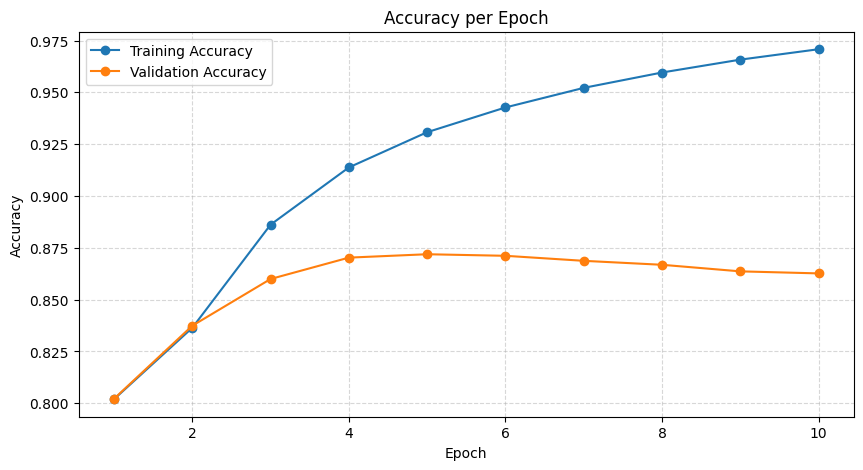

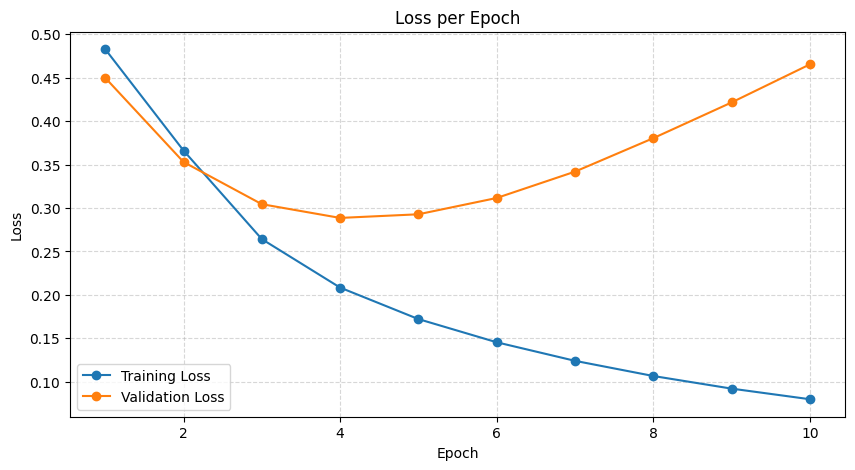

In [ ]:
#Vẽ Accuracy/Loss theo epoch
import matplotlib.pyplot as plt

# Lấy dữ liệu từ history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)
# Vẽ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# Vẽ Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
# Tập tất cả item index
all_items = set(range(num_items))

# Tập sách mỗi user đã "like" (rating >=4) trong toàn bộ ratings
full_user_pos_items = ratings.groupby('user_idx')['book_idx'].apply(set).to_dict()


In [ ]:
#Evaluate bằng HitRatio@K và NDCG@K (ranking metric)
def evaluate_model(model, test_df, k=10, num_negatives=99):
    hits = []
    ndcgs = []

    for row in test_df.itertuples():
        u = row.user_idx
        pos_item = row.book_idx

        pos_set = full_user_pos_items.get(u, set())
        neg_candidates = list(all_items - pos_set)
        if len(neg_candidates) == 0:
            continue

        # chọn ngẫu nhiên một số negative
        sampled_negs = random.sample(
            neg_candidates,
            min(num_negatives, len(neg_candidates))
        )

        # danh sách items: [positive] + negatives
        items = [pos_item] + sampled_negs
        users = [u] * len(items)

        users = np.array(users, dtype="int32")
        items = np.array(items, dtype="int32")

        preds = model.predict([users, items], verbose=0).reshape(-1)

        # sort index theo score giảm dần
        idx_sorted = np.argsort(preds)[::-1]

        # vị trí của positive item (nó nằm ở vị trí 0 trong list items ban đầu)
        rank = np.where(idx_sorted == 0)[0][0]

        # Hit@K
        hits.append(1 if rank < k else 0)

        # NDCG@K
        if rank < k:
            ndcgs.append(1 / np.log2(rank + 2))  # rank=0 -> 1/log2(2)=1
        else:
            ndcgs.append(0)

    hr = float(np.mean(hits))
    ndcg = float(np.mean(ndcgs))
    return hr, ndcg


In [ ]:
#In kết quả HR@10 và NDCG@10, đây là chỉ số quan trọng cho recommender theo top-K

hr10, ndcg10 = evaluate_model(model, test_df, k=10, num_negatives=99)

print("HitRatio@10:", f"{hr10:.4f}")
print("NDCG@10:", f"{ndcg10:.4f}")


HitRatio@10: 0.6596
NDCG@10: 0.4034


In [ ]:
#Chuẩn bị metadata để hiển thị kết quả gợi ý
#Chỉ giữ những book_id còn tồn tại sau khi bạn filter dataset.
# mapping ngược từ index -> book_id gốc
idx2book = {v: k for k, v in book2idx.items()}

# Meta sách để hiển thị
book_meta = books[['book_id', 'title', 'authors']].copy()
book_meta = book_meta[book_meta['book_id'].isin(book2idx.keys())]


In [ ]:
#Hàm recommend cho 1 user
def recommend_books_for_user(user_raw_id, model, topN=None):
    """
    Gợi ý sách cho user_raw_id.
    - Nếu topN=None  -> trả về tất cả candidate sorted theo score
    - Nếu topN=K     -> trả về K sách có score cao nhất
    Chỉ giữ lại sách có đủ title & authors (không NaN).
    """
    if user_raw_id not in user2idx:
        print(" User này không tồn tại trong dataset.")
        return pd.DataFrame()

    u_idx = user2idx[user_raw_id]

    pos = full_user_pos_items.get(u_idx, set())
    print("Số sách user đã thích:", len(pos))

    candidates = list(all_items - pos)
    print("Số sách có thể recommend:", len(candidates))

    if len(candidates) == 0:
        print(" User này đã đọc hết các sách trong dataset con.")
        return pd.DataFrame()

    candidates = np.array(candidates, dtype="int32")
    user_arr = np.full_like(candidates, fill_value=u_idx)

    # dự đoán score
    preds = model.predict([user_arr, candidates], verbose=0).reshape(-1)

    # nếu topN=None -> lấy hết, nếu > số candidate -> giới hạn lại
    if (topN is None) or (topN > len(candidates)):
        topN = len(candidates)

    # lấy topN index theo score giảm dần
    top_idx = np.argsort(preds)[-topN:][::-1]
    top_item_indices = candidates[top_idx]
    top_scores = preds[top_idx]

    # map sang book_id gốc
    inv_book2idx = {v: k for k, v in book2idx.items()}
    top_book_ids = [inv_book2idx[i] for i in top_item_indices]

    # tạo DataFrame kết quả (id + score)
    df = pd.DataFrame({
        "book_id": top_book_ids,
        "score": top_scores
    })

    # merge với metadata
    recs = df.merge(book_meta, on="book_id", how="left")

    # LOẠI BỎ TOÀN BỘ DÒNG CÓ NaN Ở title HOẶC authors
    recs = recs.dropna(subset=['title', 'authors']).reset_index(drop=True)

    # sắp xếp lại theo score
    recs = recs.sort_values('score', ascending=False).reset_index(drop=True)

    return recs[['book_id', 'title', 'authors', 'score']]


In [ ]:
#Hàm recommend cho 1 user
recs_all = recommend_books_for_user(6666, model, topN=None)
len(recs_all)    # sẽ ~ số candidate items (vd: 9,9xx)
recs_all.head(20)


Số sách user đã thích: 19
Số sách có thể recommend: 9974


,book_id,title,authors,score
0,5552,QED: The Strange Theory of Light and Matter,Richard Feynman,0.999227
1,7613,Animal Farm,George Orwell,0.994021
2,6537,"From Potter's Field (Kay Scarpetta, #6)",Patricia Cornwell,0.993648
3,6749,Oblivion,David Foster Wallace,0.990118
4,5174,Fall on Your Knees,Ann-Marie MacDonald,0.988349
5,8921,The Hound of the Baskervilles,"Arthur Conan Doyle, Anne Perry",0.987261
6,5452,Girls in Pants: The Third Summer of the Sister...,Ann Brashares,0.984962
7,7672,Congo,Michael Crichton,0.983358
8,2743,The Lost Boy (Dave Pelzer #2),Dave Pelzer,0.981985
9,6671,The Wonderful Story of Henry Sugar and Six More,Roald Dahl,0.981071
